# Цель лабораторной работы

Изучить различные методы визуализации данных.

# Задание

Требуется выполнить следующие действия:

- Выбрать набор данных (датасет).
- Создать ноутбук, который содержит следующие разделы:
 1. Текстовое описание выбранного набора данных.
 2. Основные характеристики датасета.
 3. Визуальное исследование датасета.
 4. Информация о корреляции признаков.
- Сформировать отчет и разместить его в своем репозитории на GitHub.

# Ход выполнения работы

## Текстовое описание набора данных

В качестве набора данных мы будем использовать набор данных по измерению меры бедности населения по странам - 
https://www.kaggle.com/ophi/mpi

## Контекст
Большинство стран мира определяют бедность как нехватку денег. Тем не менее, сами бедные люди считают свой опыт бедности гораздо шире. Бедный человек может одновременно страдать от множества недостатков - например, у него может быть плохое состояние здоровья или недоедание, отсутствие чистой воды или электричества, низкое качество работы или плохое обучение. Сосредоточение внимания только на одном факторе, таком как доход, недостаточно для отражения истинной реальности бедности.

Многомерные показатели бедности могут быть использованы для создания более полной картины. Они показывают, кто беден и как они бедны - целый ряд различных недостатков, которые они испытывают. Наряду с предоставлением основного показателя бедности, многомерные меры могут быть разбиты для выявления уровня бедности в разных районах страны и среди разных подгрупп людей.

## Содержание
Исследователи OPHI применяют метод AF и связанные с ним многомерные меры в различных странах и контекстах. Их анализ охватывает ряд различных тем, таких как изменения в многомерной бедности во времени, сравнения в сельской и городской бедности и неравенство среди бедных. Для получения дополнительной информации об исследованиях OPHI см. Нашу серию рабочих документов и информационные брифинги .

OPHI также рассчитывает Индекс глобальной многомерной бедности MPI , который публикуется с 2010 года в Отчете о человеческом развитии Программы развития ООН. Глобальный индекс потребительских цен является сопоставимым на международном уровне показателем острой бедности, охватывающим более 100 развивающихся стран. Он обновляется OPHI два раза в год и создается с использованием метода AF.

Метод Алкире Фостер (AF) - это способ измерения многомерной бедности, разработанный Сабиной Алкире и Джеймсом Фостером из OPHI. Опираясь на показатели бедности Фостера-Грира-Торбеке, она включает в себя подсчет различных типов лишения, которые испытывают люди в одно и то же время, таких как отсутствие образования или работы, плохое состояние здоровья или жизни. Эти профили депривации анализируются, чтобы определить, кто является бедным, а затем используются для построения многомерного индекса бедности (MPI). Бесплатные онлайн-видео-руководства о том, как использовать метод AF, см. На портале онлайн-обучения OPHI .

Чтобы определить бедных, метод AF учитывает дублирование или одновременные лишения, которые человек или домохозяйство испытывают по различным показателям бедности. Индикаторы могут быть одинаково взвешенными или иметь разные веса. Люди считаются многомерными бедными, если взвешенная сумма их лишений больше или равна отсечке бедности, например, 20%, 30% или 50% всех лишений.

Это гибкий подход, который можно адаптировать к различным ситуациям, выбирая разные измерения (например, образование), показатели бедности в каждом измерении (например, сколько лет обучения у человека) и сокращения бедности (например, человек с меньшим, чем пять лет обучения считается лишенным).

Наиболее распространенный способ измерения бедности - это рассчитать процент бедного населения, известного как коэффициент численности персонала (H). Выявив, кто беден, метод AF генерирует уникальный класс показателей бедности (Mα), который выходит за рамки простого коэффициента численности персонала. Три меры в этом классе имеют большое значение:

Скорректированный коэффициент численности персонала (M0), также известный как **MPI**: эта мера отражает как уровень бедности (доля бедного населения), так и интенсивность бедности (процент лишений, понесенных каждым человеком или домохозяйством в среднем) , M0 рассчитывается путем умножения частоты (H) на интенсивность (A). M0 = H x A.

Узнайте о других способах использования метода AF в исследованиях и политике .


вдохновение
- **Какие страны демонстрируют самые большие субнациональные различия в MPI?**
- **Какие страны имеют высокие доходы на душу населения, но при этом все еще имеют высокий рейтинг MPI?**

					
- ISO country code: уникальный идентификатор страны
- Country: название страны
- Sub-national region: регион внутри страны
- World region: Общий глобальный регион
- MPI National: Общая совокупная национальная оценка MPI
- MPI Regional: многомерный индекс бедности для этого региона
- Headcount Ratio Regional: Коэффициент численности бедных (% населения, указанного как бедный) в этом регионе
- Intensity of deprivation Regional: Среднее расстояние ниже черты бедности среди бедных в этом регионе

## Импорт библиотек

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

## Загрузка данных
Загрузим файлы датасета в помощью библиотеки Pandas.

In [2]:
# Будем анализировать данные только на обучающей выборке
data = pd.read_csv('data/MPI_subnational.csv', sep=",")

# Основные характеристики датасета

In [3]:
# Первые 5 строк датасета
data.head()

,ISO country code,Country,Sub-national region,World region,MPI National,MPI Regional,Headcount Ratio Regional,Intensity of deprivation Regional
0,AFG,Afghanistan,Badakhshan,South Asia,0.295,0.387,67.5,57.3
1,AFG,Afghanistan,Badghis,South Asia,0.295,0.466,79.3,58.8
2,AFG,Afghanistan,Baghlan,South Asia,0.295,0.300,59.7,50.3
3,AFG,Afghanistan,Balkh,South Asia,0.295,0.301,55.7,54.1
4,AFG,Afghanistan,Bamyan,South Asia,0.295,0.325,61.0,53.3


In [4]:
# Размер датасета - 8143 строк, 7 колонок
data.shape

(984, 8)

In [5]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 984


In [6]:
# Список колонок
data.columns


Index(['ISO country code', 'Country', 'Sub-national region', 'World region',
       'MPI National', 'MPI Regional', 'Headcount Ratio Regional',
       'Intensity of deprivation Regional'],
      dtype='object')

In [7]:

# Список колонок с типами данных
data.dtypes

ISO country code                      object
Country                               object
Sub-national region                   object
World region                          object
MPI National                         float64
MPI Regional                         float64
Headcount Ratio Regional             float64
Intensity of deprivation Regional    float64
dtype: object

In [8]:
# Проверим наличие пустых значений
# Цикл по колонкам датасета
for col in data.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

ISO country code - 0
Country - 0
Sub-national region - 0
World region - 0
MPI National - 0
MPI Regional - 0
Headcount Ratio Regional - 0
Intensity of deprivation Regional - 1


In [9]:
# Основные статистические характеристки набора данных
data.describe()

,MPI National,MPI Regional,Headcount Ratio Regional,Intensity of deprivation Regional
count,984.000000,984.000000,984.000000,983.000000
mean,0.204107,0.211330,40.184451,47.180977
std,0.160248,0.183621,29.981403,8.047225
min,0.006000,0.000000,0.000000,33.300000
25%,0.066000,0.053000,12.475000,41.400000
50%,0.174000,0.155000,33.950000,45.600000
75%,0.303000,0.341500,66.725000,51.900000
max,0.605000,0.744000,99.000000,75.900000


In [10]:
# Определим уникальные значения для целевого признака
data['Country'].unique()

array(['Afghanistan', 'Burundi', 'Benin', 'Burkina Faso', 'Bangladesh',
       'Belize', 'Bolivia, Plurinational State of', 'Brazil', 'Bhutan',
       'Central African Republic', 'China', "Cote d'Ivoire", 'Cameroon',
       'Congo, Democratic Republic of the', 'Congo, Republic of',
       'Colombia', 'Comoros', 'Djibouti', 'Dominican Republic', 'Ecuador',
       'Egypt', 'Ethiopia', 'Gabon', 'Ghana', 'Guinea', 'Gambia',
       'Guinea-Bissau', 'Guatemala', 'Guyana', 'Honduras', 'Haiti',
       'Indonesia', 'Iraq', 'Jamaica', 'Jordan', 'Kenya', 'Cambodia',
       "Lao People's Democratic Republic", 'Liberia', 'Lesotho',
       'Morocco', 'Madagascar', 'Mali', 'Myanmar', 'Mongolia',
       'Mozambique', 'Mauritania', 'Malawi', 'Namibia', 'Niger',
       'Nigeria', 'Nicaragua', 'Nepal', 'Pakistan', 'Peru', 'Philippines',
       'Rwanda', 'Sudan', 'Senegal', 'Sierra Leone', 'El Salvador',
       'South Sudan', 'Sao Tome and Principe', 'Suriname', 'Swaziland',
       'Syrian Arab Republic',

# Визуальное исследование датасета

Для визуального исследования могут быть использованы различные виды диаграмм, мы построим только некоторые варианты диаграмм, которые используются достаточно часто.

##  [Диаграмма рассеивания](https://en.wikipedia.org/wiki/Scatter_plot)
Позволяет построить распределение двух колонок данных и визуально обнаружить наличие зависимости. Не предполагается, что значения упорядочены (например, по времени).

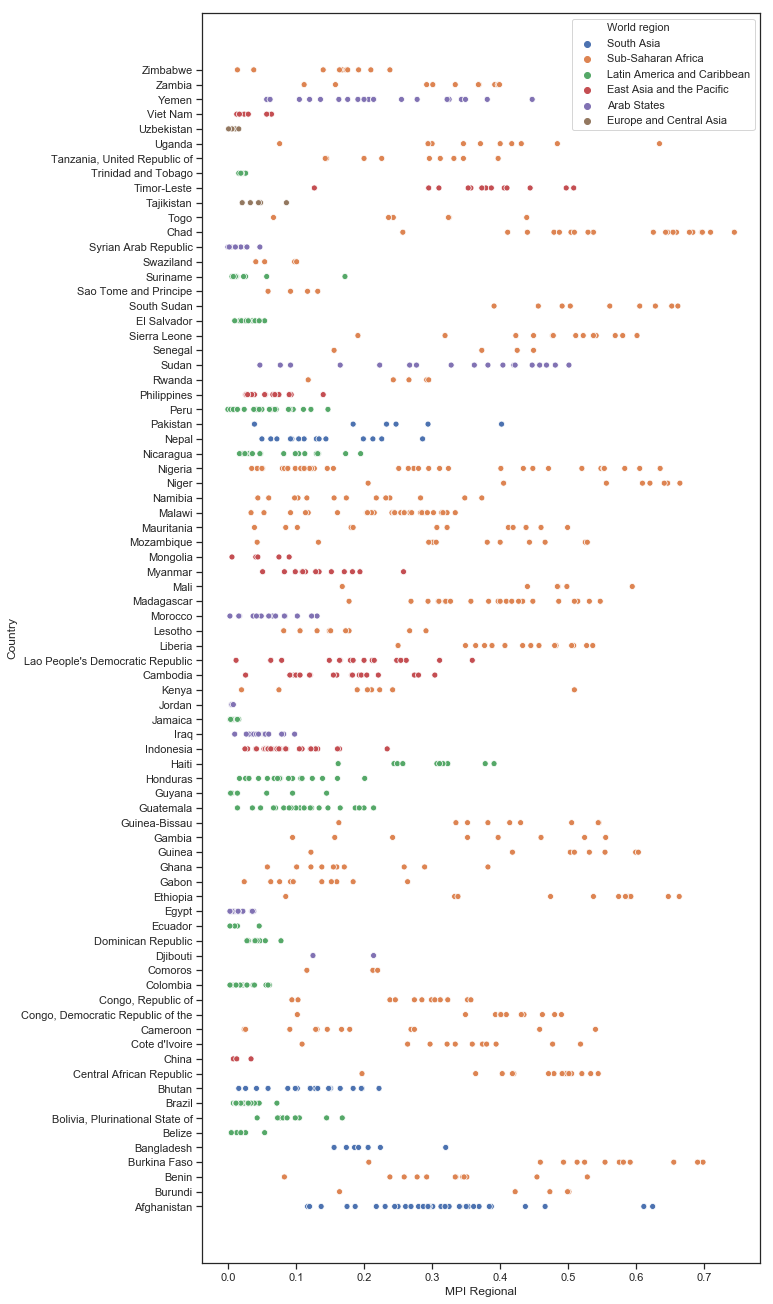

In [11]:
fig, ax = plt.subplots(figsize=(10,23)) 
sns.scatterplot(ax=ax, x='MPI Regional', y='Country', data=data, hue='World region')

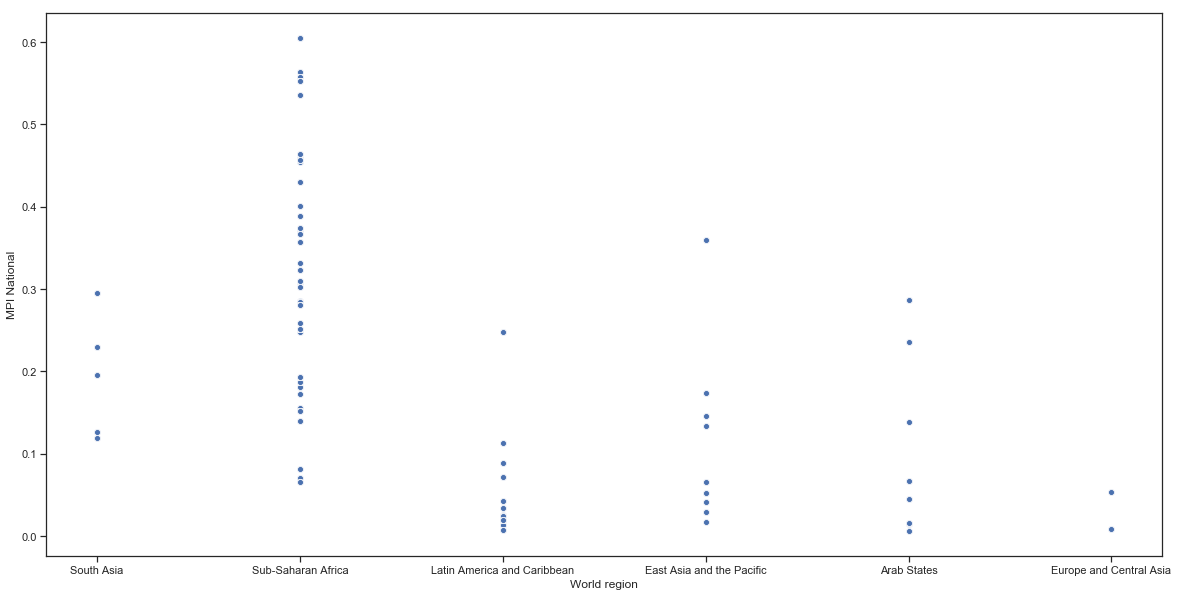

In [12]:
fig, ax = plt.subplots(figsize=(20,10)) 
sns.scatterplot(ax=ax, x='World region', y='MPI National', data=data)

## [Гистограмма](https://en.wikipedia.org/wiki/Histogram)
Позволяет оценить плотность вероятности распределения данных.

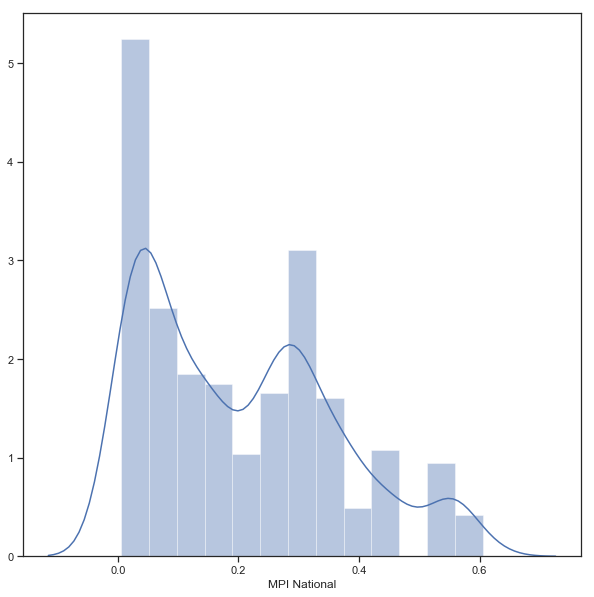

In [13]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.distplot(data['MPI National'])

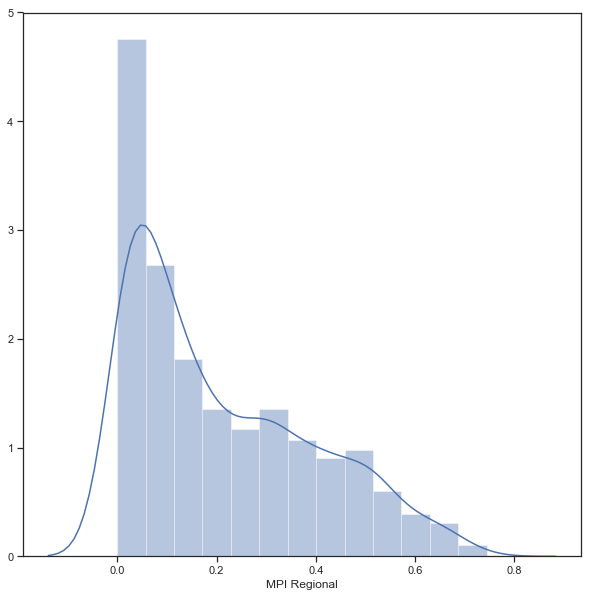

In [14]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.distplot(data['MPI Regional'])

## Jointplot
Комбинация гистограмм и диаграмм рассеивания. **Не могу посотреть по странам**

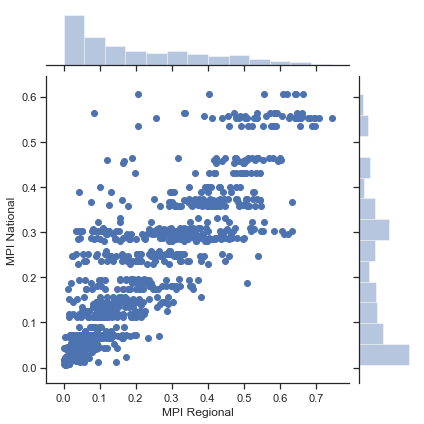

In [15]:
sns.jointplot(x='MPI Regional', y='MPI National', data=data)


С помощью параметра "hue" возможна группировка по значениям какого-либо признака.

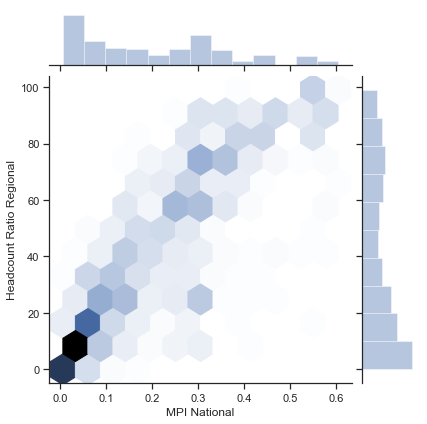

In [16]:
sns.jointplot(x='MPI National', y='Headcount Ratio Regional', data=data, kind="hex")

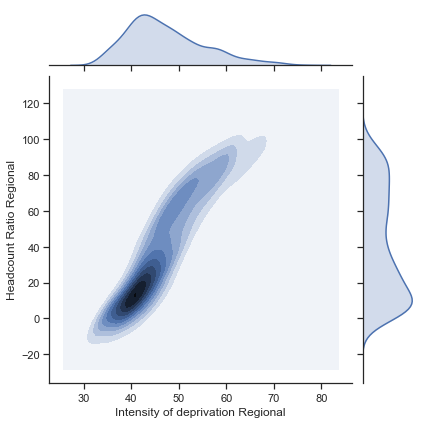

In [17]:
sns.jointplot(x='Intensity of deprivation Regional', y='Headcount Ratio Regional', data=data, kind="kde")

## "Парные диаграммы"

Комбинация гистограмм и диаграмм рассеивания для всего набора данных.

Выводится матрица графиков. На пересечении строки и столбца, которые соответстуют двум показателям, строится диаграмма рассеивания. 
В главной диагонали матрицы строятся гистограммы распределения соответствующих показателей.

c:\users\дмитрий\documents\virtualenv\tensorflow\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\дмитрий\documents\virtualenv\tensorflow\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


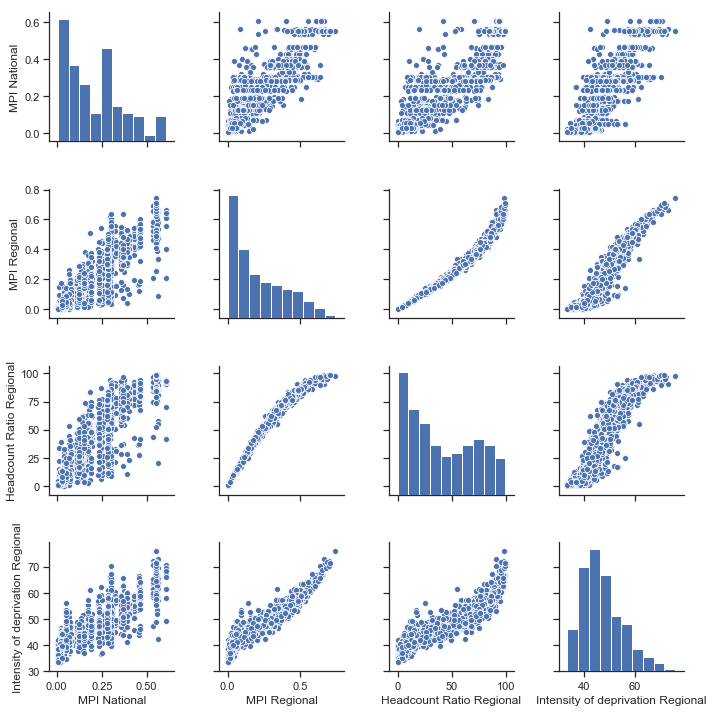

In [18]:
sns.pairplot(data)


С помощью параметра "hue" возможна группировка по значениям какого-либо признака.

# Информация о корреляции признаков

Проверка корреляции признаков позволяет решить две задачи:

1. Понять какие признаки (колонки датасета) наиболее сильно коррелируют с целевым признаком (в нашем примере это колонка "Occupancy"). Именно эти признаки будут наиболее информативными для моделей машинного обучения. Признаки, которые слабо коррелируют с целевым признаком, можно попробовать исключить из построения модели, иногда это повышает качество модели. Нужно отметить, что некоторые алгоритмы машинного обучения автоматически определяют ценность того или иного признака для построения модели.

2. Понять какие нецелевые признаки линейно зависимы между собой. Линейно зависимые признаки, как правило, очень плохо влияют на качество моделей. Поэтому если несколько признаков линейно зависимы, то для построения модели из них выбирают какой-то один признак.

In [19]:
data.corr()

,MPI National,MPI Regional,Headcount Ratio Regional,Intensity of deprivation Regional
MPI National,1.000000,0.859133,0.855590,0.813633
MPI Regional,0.859133,1.000000,0.983978,0.944679
Headcount Ratio Regional,0.855590,0.983978,1.000000,0.902984
Intensity of deprivation Regional,0.813633,0.944679,0.902984,1.000000


In [20]:

data.corr(method='pearson')

,MPI National,MPI Regional,Headcount Ratio Regional,Intensity of deprivation Regional
MPI National,1.000000,0.859133,0.855590,0.813633
MPI Regional,0.859133,1.000000,0.983978,0.944679
Headcount Ratio Regional,0.855590,0.983978,1.000000,0.902984
Intensity of deprivation Regional,0.813633,0.944679,0.902984,1.000000


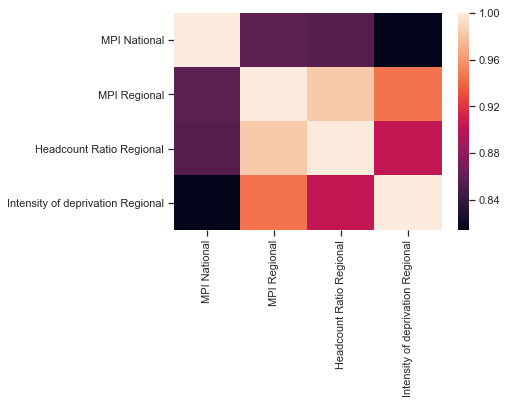

In [21]:

sns.heatmap(data.corr())

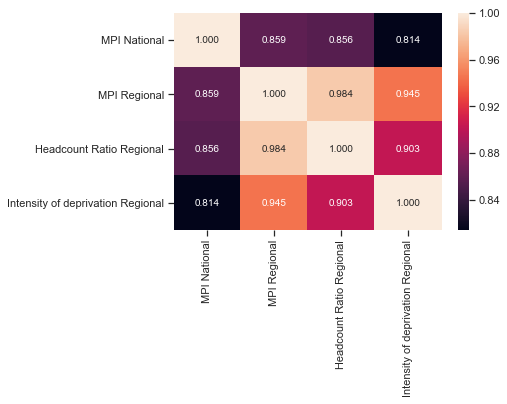

In [22]:
# Вывод значений в ячейках
sns.heatmap(data.corr(), annot=True, fmt='.3f')

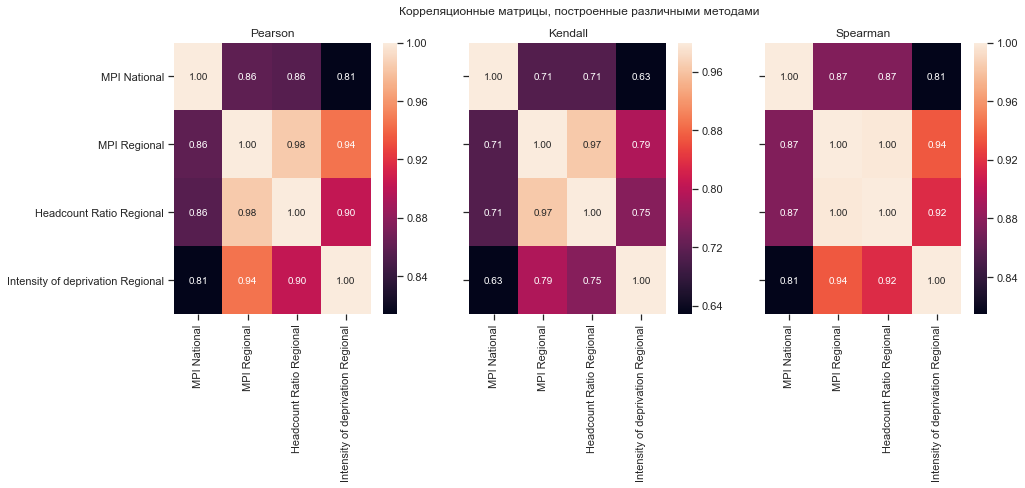

In [23]:

fig, ax = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(15,5))
sns.heatmap(data.corr(method='pearson'), ax=ax[0], annot=True, fmt='.2f')
sns.heatmap(data.corr(method='kendall'), ax=ax[1], annot=True, fmt='.2f')
sns.heatmap(data.corr(method='spearman'), ax=ax[2], annot=True, fmt='.2f')
fig.suptitle('Корреляционные матрицы, построенные различными методами')
ax[0].title.set_text('Pearson')
ax[1].title.set_text('Kendall')
ax[2].title.set_text('Spearman')